## Singular Value Decomposition (SVD)

<p>Singular Value Decomposition (SVD) stands as a versatile mathematical technique with profound implications across various fields. In this notebook along with the additional python file I have explained its mechanics, from decomposing 2D matrices to its practical applications in image compression and fc-layer in convolutional neural networks (CNNs) like Fast R-CNN. Its integration into Fast R-CNN demonstrates how SVD contributes to model optimization, enhancing both performance and computational efficiency.</p>

### SVD calculation step by step

In [1]:
import numpy as np

# Matrix A with 3x4 shape is defined

A = np.array([[3,2,1,5],[5,6,7,9],[7,3,4,8]])
A.shape
A

array([[3, 2, 1, 5],
       [5, 6, 7, 9],
       [7, 3, 4, 8]])

In [2]:
# To create a symmetric matrix, A.A_transpose is performed

A_A_t = np.dot(A, np.transpose(A))
A_A_t

array([[ 39,  79,  71],
       [ 79, 191, 153],
       [ 71, 153, 138]])

In [3]:
# Eigen vectors and Eigen values for this symmetric matrix are determined

eig_val, eig_vec = np.linalg.eigh(A_A_t)
eig_val

array([  1.91656375,  10.68194086, 355.40149539])

In [4]:
eig_root = np.sqrt(np.round(eig_val, 2))
eig_root = np.sort(eig_root)[::-1]
eig_root

array([18.85205559,  3.26802693,  1.38564065])

In [5]:
root_S_a = np.diag(eig_root)
root_S_a

array([[18.85205559,  0.        ,  0.        ],
       [ 0.        ,  3.26802693,  0.        ],
       [ 0.        ,  0.        ,  1.38564065]])

In [6]:
# Eigen vectors of this symmetric matrix (A.A_transpose) is one part of this decomposition

left = eig_vec
print(left)

[[-0.86570898  0.38644937 -0.31812709]
 [-0.04190693 -0.68928434 -0.72327789]
 [ 0.4987903   0.61281644 -0.61291455]]


In [7]:
# changing the eigen vector column according to eigen value

left[:, [0, 2]] = left[:, [2, 0]]
left[:, 1] *= -1
left

array([[-0.31812709, -0.38644937, -0.86570898],
       [-0.72327789,  0.68928434, -0.04190693],
       [-0.61291455, -0.61281644,  0.4987903 ]])

In [8]:
# Another symmetric matrix is created by A_transpose.A operation

A_t_A = np.dot(np.transpose(A),A)
A_t_A

array([[ 83,  57,  66, 116],
       [ 57,  49,  56,  88],
       [ 66,  56,  66, 100],
       [116,  88, 100, 170]])

In [9]:
# Eigen vectors and Eigen values for this symmetric matrix are determined

eig_val, eig_vec = np.linalg.eig(A_t_A)
eig_vec

array([[ 0.47003649,  0.61274266,  0.4947056 , -0.39859567],
       [ 0.36148052, -0.4664036 , -0.35140754, -0.72685092],
       [ 0.41548329, -0.60804111,  0.60394656,  0.30480845],
       [ 0.68976168,  0.1931324 , -0.51674719,  0.46893608]])

In [10]:
# Eigen values for both A.At and At.A are the same

S_b = np.sqrt(np.round(eig_val,2))
S_b

array([18.85205559,  3.26802693,  1.38564065, -0.        ])

In [11]:
root_S_a = np.diag(S_b)
root_S_a

array([[18.85205559,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.26802693,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.38564065,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.        ]])

In [12]:
# Eigen vectors of this symmetric matrix (A_transpose.A) is used to create another part of this decomposition

right = eig_vec
right

array([[ 0.47003649,  0.61274266,  0.4947056 , -0.39859567],
       [ 0.36148052, -0.4664036 , -0.35140754, -0.72685092],
       [ 0.41548329, -0.60804111,  0.60394656,  0.30480845],
       [ 0.68976168,  0.1931324 , -0.51674719,  0.46893608]])

In [13]:
# Another part of the decomposition is the transpose of V

right_t = np.transpose(right)
right_t[:2, :] *= -1
right_t

array([[-0.47003649, -0.36148052, -0.41548329, -0.68976168],
       [-0.61274266,  0.4664036 ,  0.60804111, -0.1931324 ],
       [ 0.4947056 , -0.35140754,  0.60394656, -0.51674719],
       [-0.39859567, -0.72685092,  0.30480845,  0.46893608]])

In [14]:
# Cross checking if the decomposed matrices produces the original matrix

svd_composed = left[:,:3]*eig_root[0:3]@right_t[:3,:]
np.round(svd_composed,2)

array([[3., 2., 1., 5.],
       [5., 6., 7., 9.],
       [7., 3., 4., 8.]])

#### We can also use in-built svd function in numpy

In [15]:
U,S,V_t = np.linalg.svd(A)

In [16]:
U[:,:3]*S[0:3]@V_t[:3,:]

array([[3., 2., 1., 5.],
       [5., 6., 7., 9.],
       [7., 3., 4., 8.]])

In [17]:
tw = U[:,:2]*S[0:2]@V_t[:2,:]

In [18]:
# Find the rank of the array
rank_r = np.linalg.matrix_rank(U[:,:2]*S[0:2]@V_t[:2,:])


print("Rank of the red-array:", rank_r)


Rank of the red-array: 2


### From np documentation

#### 2d matrix

In [19]:
a = np.random.randn(20, 300)
a.size

6000

In [20]:
U, S, Vh = np.linalg.svd(a, full_matrices=True)

In [21]:
print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vh shape: {Vh.shape}')

U shape: (20, 20)
S shape: (20,)
Vh shape: (300, 300)


In [22]:
u = U[:, :5] * S[:5]
u.shape

(20, 5)

In [23]:
v = np.dot(u, Vh[:5,:])
v.shape

(20, 300)

In [24]:
np.allclose(a, np.dot(U * S, Vh[:20,:]))

True

-- reconstruction (not full matrix)

In [25]:
U, S, Vh = np.linalg.svd(a, full_matrices=False)

In [26]:
print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vh shape: {Vh.shape}')

U shape: (20, 20)
S shape: (20,)
Vh shape: (20, 300)


In [27]:
np.allclose(a, np.dot(U * S, Vh))

True

#### 4d matrix

In [28]:
b = np.random.randn(2, 7, 8, 3)
b.size

336

In [29]:
U, S, Vh = np.linalg.svd(b, full_matrices=True)

In [30]:
print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vh shape: {Vh.shape}')

U shape: (2, 7, 8, 8)
S shape: (2, 7, 3)
Vh shape: (2, 7, 3, 3)


In [31]:
np.allclose(b, np.matmul(U[..., :3] * S[..., None, :], Vh))

True

In [32]:
np.allclose(b, np.matmul(U[..., :3], S[..., None] * Vh))

True

### Image Compression

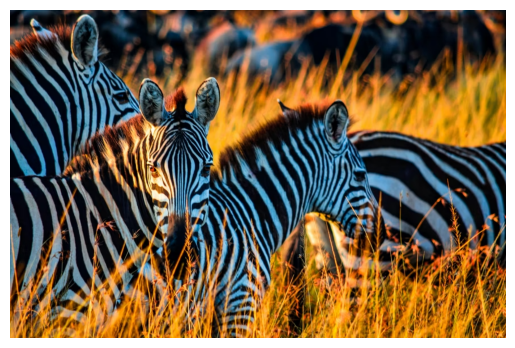

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


# Open the image
img = Image.open('zebra.png') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()


In [34]:
img.size

(876, 580)

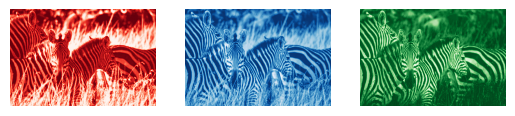

In [35]:
# Split the image into its RGB components
r, g, b = img.split()

plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds_r')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Blues_r')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Greens_r')
plt.axis('off')
plt.show()

In [36]:
# convert the RGB channels into numpy array

img_np_r = np.array(r)
img_np_g = np.array(g)
img_np_b = np.array(b)

In [37]:
# Find the rank of the array
rank_r = np.linalg.matrix_rank(img_np_r)
rank_g = np.linalg.matrix_rank(img_np_g)
rank_b = np.linalg.matrix_rank(img_np_b)

print("Rank of the red-array:", rank_r)
print("Rank of the green-array:", rank_g)
print("Rank of the blue-array:", rank_b)

Rank of the red-array: 580
Rank of the green-array: 580
Rank of the blue-array: 580


In [38]:
# Display the shape of the three NumPy arrays

print("Shape of the NumPy array:", img_np_r.shape)
print("Shape of the NumPy array:", img_np_g.shape)
print("Shape of the NumPy array:", img_np_b.shape)

Shape of the NumPy array: (580, 876)
Shape of the NumPy array: (580, 876)
Shape of the NumPy array: (580, 876)


In [39]:
# SVD for each channel

U_R, S_R, Vt_R = np.linalg.svd(img_np_r, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(img_np_g, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(img_np_b, full_matrices=False)


In [40]:
def svd_compress(r,g,b):
    R_compressed = np.matrix(U_R[:, :r]) * np.diag(S_R[:r]) * np.matrix(Vt_R[:r, :])
    G_compressed = np.matrix(U_G[:, :g]) * np.diag(S_G[:g]) * np.matrix(Vt_G[:g, :])
    B_compressed = np.matrix(U_B[:, :b]) * np.diag(S_B[:b]) * np.matrix(Vt_B[:b, :])

    # clipping of values outside the pixel range
    R_compressed = np.clip(R_compressed, 1, 255)
    G_compressed = np.clip(G_compressed, 1, 255)
    B_compressed = np.clip(B_compressed, 1, 255)
    
    # Find the rank of the array
    rank_r = np.linalg.matrix_rank(R_compressed)
    rank_g = np.linalg.matrix_rank(G_compressed)
    rank_b = np.linalg.matrix_rank(B_compressed)

    print("Rank of the red-array:", rank_r)
    print("Rank of the green-array:", rank_g)
    print("Rank of the blue-array:", rank_b)

    # convert numpy to PIL
    R_pil = Image.fromarray(R_compressed.astype(np.uint8))
    G_pil = Image.fromarray(G_compressed.astype(np.uint8))
    B_pil = Image.fromarray(B_compressed.astype(np.uint8))
    
    return R_pil, G_pil, B_pil



Rank of the red-array: 553
Rank of the green-array: 395
Rank of the blue-array: 519


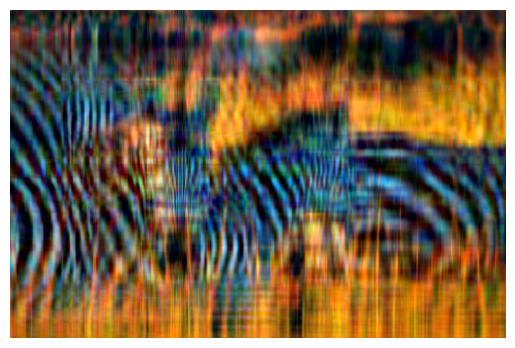

In [41]:
# compressed using top 10 singular values

R_pil_10, G_pil_10, B_pil_10 = svd_compress(10,10,10)
merged_image_10 = Image.merge('RGB', (R_pil_10, G_pil_10, B_pil_10))
plt.imshow(merged_image_10)
plt.axis('off')
plt.show()

Rank of the red-array: 553
Rank of the green-array: 556
Rank of the blue-array: 572


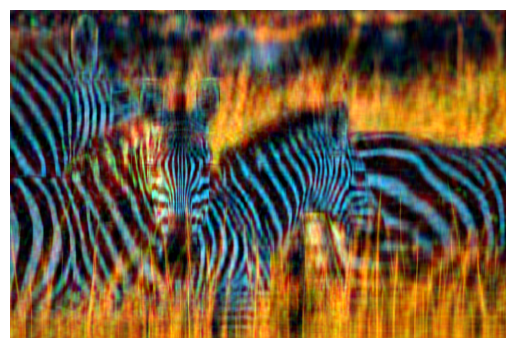

In [42]:
# compressed using top 30 singular values

R_pil_30, G_pil_30, B_pil_30 = svd_compress(10,30,20)
merged_image_30 = Image.merge('RGB', (R_pil_30, G_pil_30, B_pil_30))
plt.imshow(merged_image_30)
plt.axis('off')
plt.show()

Rank of the red-array: 307
Rank of the green-array: 395
Rank of the blue-array: 353


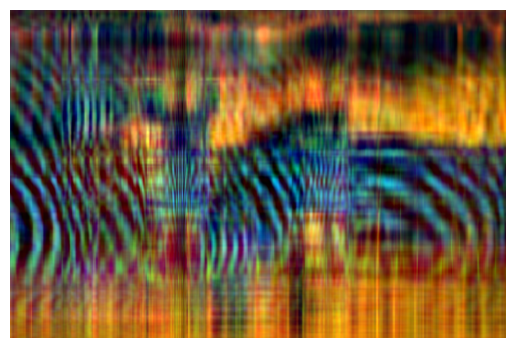

In [43]:
# compressed using top 50 singular values

R_pil_50, G_pil_50, B_pil_50 = svd_compress(5,10,5)
merged_image_50 = Image.merge('RGB', (R_pil_50, G_pil_50, B_pil_50))
plt.imshow(merged_image_50)
plt.axis('off')
plt.show()

Rank of the red-array: 580
Rank of the green-array: 580
Rank of the blue-array: 580


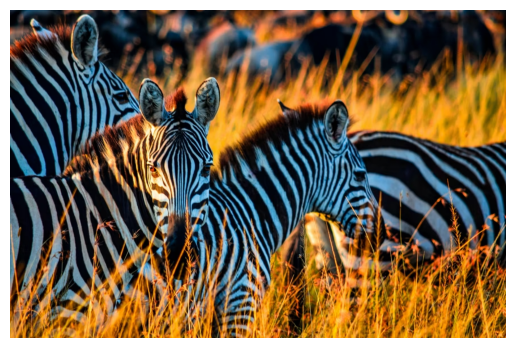

In [44]:
# compressed using top 500 singular values

R_pil_500, G_pil_500, B_pil_500 = svd_compress(500,500,500)
merged_image_500 = Image.merge('RGB', (R_pil_500, G_pil_500, B_pil_500))
plt.imshow(merged_image_500)
plt.axis('off')
plt.show()

### Hardware size occupied by Original and svd compressed images

In [45]:
import os

# Get the size of the original image file in bytes
file_size_bytes = os.path.getsize('zeb_og.png')

# Convert bytes to kilobytes
file_size_kb = file_size_bytes / 1024  # 1 kilobyte = 1024 bytes

print("File size of the image in KB:", file_size_kb)

File size of the image in KB: 378.1826171875


In [46]:
# Get the size of the compressed image with 500 singular values
file_size_bytes = os.path.getsize('500.png')

# Convert bytes to kilobytes
file_size_kb = file_size_bytes / 1024  # 1 kilobyte = 1024 bytes

print("File size of the image in KB:", file_size_kb)

File size of the image in KB: 377.66015625


In [47]:
# Get the size of the compressed image with 10, 30, 20 singular values
file_size_bytes = os.path.getsize('103020.png')

# Convert bytes to kilobytes
file_size_kb = file_size_bytes / 1024  # 1 kilobyte = 1024 bytes

print("File size of the image in KB:", file_size_kb)

File size of the image in KB: 320.7236328125


In [48]:
# Get the size of the compressed image with 10, 10, 10 singular values
file_size_bytes = os.path.getsize('101010.png')

# Convert bytes to kilobytes
file_size_kb = file_size_bytes / 1024  # 1 kilobyte = 1024 bytes

print("File size of the image in KB:", file_size_kb)

File size of the image in KB: 291.4208984375


In [49]:
# Get the size of the compressed image with 5, 20, 5 singular values
file_size_bytes = os.path.getsize('5105.png')

# Convert bytes to kilobytes
file_size_kb = file_size_bytes / 1024  # 1 kilobyte = 1024 bytes

print("File size of the image in KB:", file_size_kb)

File size of the image in KB: 267.564453125
